In [38]:
import pandas as pd
import datetime
import chardet
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import numpy as np

In [39]:
# Function to extract epoch from the first few rows of the CSV file
def extract_epoch_from_header(file):
    # Read the first few lines to find the epoch (assuming it's in a comment or a header)
    with open(file, 'r') as f:
        skiprow = f.readline()
        skiprow = skiprow.strip().split()[0]
        for line in f:
            if "startdate:" in line.lower():  # Assuming the word 'epoch' is present in the line
                # Extract the epoch date (this assumes the date is the second item in the line)
                epoch = line.strip().split()[1]
                return int(skiprow)-1, epoch[0:4]+"-"+epoch[4:6]+"-"+epoch[6:8]+" "+epoch[8:10]+":"+epoch[10:12]+":"+epoch[12:14]
    return None  # Return None if no epoch is found

# Function to load and adjust time for each CSV
def load_and_adjust_time(file):
    # Try to extract the epoch from the header or a specific column
    nskiprows,epoch = extract_epoch_from_header(file)
   
    if epoch is None:
        raise ValueError(f"Could not find epoch for file: {file}")
   
    # Load the actual data (skipping header if necessary)
    df = pd.read_csv(file, skiprows=nskiprows,sep="\s+")  # Adjust skiprows based on where the data starts
   
    # Convert 'time' column to a datetime, assuming it's in days
    # Adjust time column to start from the epoch time found in the file
    df['starttime_dt'] = pd.to_timedelta(df['start_time'], unit='D') + pd.Timestamp(epoch)
    df = df[df.numflag_wind_speed != 0.999]
    df.index = df["starttime_dt"]
    #data["starttime_dt"] = pd.to_datetime(data["starttime"],unit='D',origin=pd.Timestamp('2015-01-01 00:41:00'))
   
    # Return the adjusted DataFrame
    return df

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1878179/435719511.py:23: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, skiprows=nskiprows,sep="\s+")  # Adjust skiprows based on where the data starts


In [40]:
file = '../data_meteo/IT0014R.20240101000000.20250214101300.aws..met.1y.1mn...lev0.nas'
df = load_and_adjust_time(file)




In [24]:
df.head()

,start_time,end_time,wind_speed,numflag_wind_speed,wind_direction,numflag_wind_direction,temperature,numflag_temperature,relative_humidity,numflag_relative_humidity,pressure,numflag_pressure,global_radiation,numflag_global_radiation,starttime_dt
starttime_dt,,,,,,,,,,,,,,,
2024-01-01 00:00:00.000000000,0.000000,0.000694,2.3,0.0,53,0.0,11.4,0.0,92,0.0,1018.9,0.0,-1.00,0.0,2024-01-01 00:00:00.000000000
2024-01-01 00:00:59.961599999,0.000694,0.001389,2.1,0.0,55,0.0,11.4,0.0,92,0.0,1018.9,0.0,-0.77,0.0,2024-01-01 00:00:59.961599999
2024-01-01 00:02:00.009600000,0.001389,0.002083,2.0,0.0,55,0.0,11.4,0.0,93,0.0,1018.9,0.0,-0.53,0.0,2024-01-01 00:02:00.009600000
2024-01-01 00:02:59.971200000,0.002083,0.002778,2.0,0.0,48,0.0,11.5,0.0,93,0.0,1018.9,0.0,-0.52,0.0,2024-01-01 00:02:59.971200000
2024-01-01 00:04:00.019200000,0.002778,0.003472,2.2,0.0,45,0.0,11.5,0.0,93,0.0,1018.9,0.0,-0.74,0.0,2024-01-01 00:04:00.019200000


In [41]:
df.drop(columns=['start_time','end_time', 'relative_humidity', 'numflag_relative_humidity', 'pressure', 'numflag_pressure', 'global_radiation', 'numflag_global_radiation', 'starttime_dt'], inplace=True)
df.head()

,wind_speed,numflag_wind_speed,wind_direction,numflag_wind_direction,temperature,numflag_temperature
starttime_dt,,,,,,
2024-01-01 00:00:00.000000000,2.3,0.0,53,0.0,11.4,0.0
2024-01-01 00:00:59.961599999,2.1,0.0,55,0.0,11.4,0.0
2024-01-01 00:02:00.009600000,2.0,0.0,55,0.0,11.4,0.0
2024-01-01 00:02:59.971200000,2.0,0.0,48,0.0,11.5,0.0
2024-01-01 00:04:00.019200000,2.2,0.0,45,0.0,11.5,0.0


In [47]:
print("Column names:")
print(df.columns.tolist())

Column names:
['wind_speed', 'numflag_wind_speed', 'wind_direction', 'numflag_wind_direction', 'temperature', 'numflag_temperature']


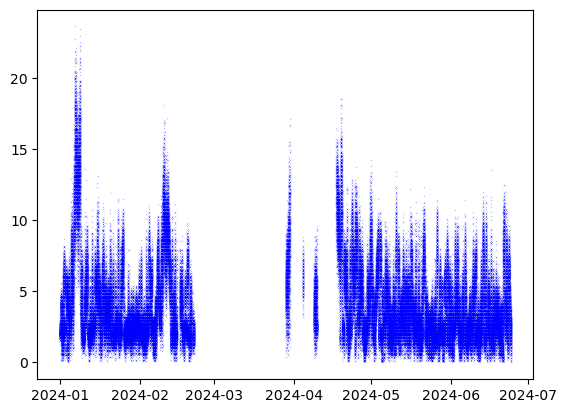

In [56]:
plt.scatter(df.index, df['wind_speed'], marker='x', s=0.003, color='blue', label='Temperature', )

In [ ]:

#loop for rounding to the hours
df["starttime_dt"] = [i.round("H") for i in df["starttime_dt"]]
df


KeyError: 'starttime_dt'

In [ ]:
# Quick and dirty way to see what's in the file
def quick_debug_nas(filename):
    try:
        # Try to detect encoding
        with open(filename, 'rb') as f:
            raw_data = f.read()
            encoding = chardet.detect(raw_data)['encoding']
            print(f"Encoding: {encoding}")
        
        # Read first few lines
        with open(filename, 'r', encoding=encoding, errors='ignore') as f:
            for i in range(40):
                line = f.readline()
                print(f"Line {i+1}: {repr(line)}")
                
        # Try to get basic info
        file_size = os.path.getsize(filename)
        print(f"File size: {file_size} bytes")
        
    except Exception as e:
        print(f"Error: {e}")

# Usage
quick_debug_nas('C:\YEAR1\meteo_CG\IT0014R.20240101000000.20250214101300.aws..met.1y.1mn...lev0.nas')